In [ ]:
from google.colab import drive

try:
    MOUNTED
except NameError as e:
    drive.mount('/gdrive')
    MOUNTED = True

Mounted at /gdrive


### 새 섹션

> 들여쓴 블록

---





## ㅁㅇㄴㄴㅁㅇ

# 새 섹션

In [ ]:
!pip show pandas

Name: pandas
Version: 1.1.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: pytz, numpy, python-dateutil
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, altair


In [ ]:
!pip show pandas_profiling

Name: pandas-profiling
Version: 1.4.1
Summary: Generate profile report for pandas DataFrame
Home-page: http://github.com/jospolfliet/pandas-profiling
Author: Jos Polfliet
Author-email: jos.polfliet+panpro@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: pandas, six, matplotlib, jinja2
Required-by: 


In [ ]:
pip install pandas==1.1.4

     |████████████████████████████████| 9.5MB 5.5MB/s 
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
pip install pandas-profiling==2.8.0

     |████████████████████████████████| 266kB 4.4MB/s 
     |████████████████████████████████| 71kB 5.1MB/s 
     |████████████████████████████████| 604kB 7.3MB/s 
     |████████████████████████████████| 3.1MB 13.4MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 296kB 28.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=4905280e297b0793dee38e9483e0be97bb35cbaf99bda6f8e65a1953b274f985
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4MB 65.1MB/s 
     |████████████████████████████████| 92kB 10.8MB/s 
     |████████████████████████████████| 460kB 47.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,744 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and d

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
%matplotlib inline
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import json
import os
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras import layers
from keras import Sequential
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from wordcloud import WordCloud


#train_data_senti.csv/test_data_senti.csv 사용하여 모델학습
path_name1 = '영화감성분석'
path_name2_init = '감성영화데이터'
okt = Okt()
path='../gdrive/My Drive/데이터마이닝/'
# df_all = pd.read_csv(path + path_name1 + '/' + path_name2_init + '.csv')
# train_data = pd.read_csv(path + 'train_data_senti.csv')
# test_data = pd.read_csv(path + 'test_data_senti.csv')
df_testset = pd.read_csv(path + '무작위영화데이터.csv')
df_da = pd.read_csv(path + '무작위영화데이터_시각화.csv')

In [ ]:
df_testset = df_testset.drop(['Unnamed: 0'],axis=1)
df_testset.drop_duplicates(subset=['영화제목'], inplace=True)
df_testset['리뷰내용'] = df_testset['리뷰내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_testset['장르'] = df_testset['장르'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_testset[:5]

,별점,리뷰내용,작성자,작성일자,공감,비공감,영화제목,카테고리,장르,감독,상영시간,영화평점
0,10,성 정체성이 흔들렸다,너프(elun****),2013.07.20 01:32,6084,189,아저씨,test,액션 범죄 드라마,이정범,119분,9.24
100,8,아메리카 마인드 또라이 두명이 스크린을 휘저어놓는다 근데 왠지 남 얘기같지 않다 영...,85yo****,2013.07.20 15:07,768,139,실버라이닝 플레이북,test,코미디 드라마 멜로로맨스,데이비드 O. 러셀,122분,8.60
200,10,이 영화의 아름다움을 영원히 느끼지 못하고 평점테러중인 호모포비아들이 애잔함,수정 유(hwer****),2018.03.22 17:52,3701,1043,콜 미 바이 유어 네임,test,드라마 멜로로맨스,루카 구아다니노,132분,7.89
300,4,김규리 배우 연기 정말 부족하네요 다른 주 조연 분들은 연기 잘하시는데 혼자 아침드...,Deviant(gyeo****),2019.05.16 21:10,5875,1801,악인전,test,범죄 액션,이원태,110분,7.88
400,10,박화영의 캐릭터를 연기한 김가희 배우님께 박수를 보냅니다 그리고 영화 속 화영이에게...,김륜이(fbsd****),2018.07.28 15:26,1879,67,박화영,test,드라마,이환,99분,7.72


In [ ]:
df_da = df_testset[['영화제목','장르','감독','상영시간','영화평점']]
idx_nm1 = df_da[df_da['영화제목'] == '명당'].index
df_da1 = df_da.drop(idx_nm1)
idx_nm1 = df_da1[df_da1['영화제목'] == '천문: 하늘에 묻는다'].index
df_da = df_da1.drop(idx_nm1)
df_da.reset_index(inplace=True)
df_da = df_da.drop(['index'],axis=1)

In [ ]:
# df_da.to_csv(path + '무작위영화데이터_시각화.csv', index=False)

In [ ]:
df_testset

,별점,리뷰내용,작성자,작성일자,공감,비공감,영화제목,카테고리,장르,감독,상영시간,영화평점
0,10,성 정체성이 흔들렸다,너프(elun****),2013.07.20 01:32,6084,189,아저씨,test,액션 범죄 드라마,이정범,119분,9.24
100,8,아메리카 마인드 또라이 두명이 스크린을 휘저어놓는다 근데 왠지 남 얘기같지 않다 영...,85yo****,2013.07.20 15:07,768,139,실버라이닝 플레이북,test,코미디 드라마 멜로로맨스,데이비드 O. 러셀,122분,8.60
200,10,이 영화의 아름다움을 영원히 느끼지 못하고 평점테러중인 호모포비아들이 애잔함,수정 유(hwer****),2018.03.22 17:52,3701,1043,콜 미 바이 유어 네임,test,드라마 멜로로맨스,루카 구아다니노,132분,7.89
300,4,김규리 배우 연기 정말 부족하네요 다른 주 조연 분들은 연기 잘하시는데 혼자 아침드...,Deviant(gyeo****),2019.05.16 21:10,5875,1801,악인전,test,범죄 액션,이원태,110분,7.88
400,10,박화영의 캐릭터를 연기한 김가희 배우님께 박수를 보냅니다 그리고 영화 속 화영이에게...,김륜이(fbsd****),2018.07.28 15:26,1879,67,박화영,test,드라마,이환,99분,7.72
...,...,...,...,...,...,...,...,...,...,...,...,...
78595,4,나만 이해못했나봐아직도 마사지 하는 춤춘애는 왜나온건지같이 산책하던 여자앤 누군지 ...,여자사람(tlst****),2016.01.08 20:11,198,80,유스,영화데이터,드라마,파올로 소렌티노,124분,8.34
78795,10,몇분이서 오셨어요 와저씨 한명이요,ckj(pck9****),2016.06.09 00:14,2572,183,워크래프트: 전쟁의 서막,영화데이터,액션 모험 판타지,던칸 존스,122분,8.66
78895,10,이것이 한국 토속 신앙이다 우리가 부정했지만 불안할때마다 기댔던 신앙의 보고서,시리우스(sols****),2014.03.07 17:18,384,55,만신,영화데이터,다큐멘터리 드라마,박찬경,104분,8.04
79095,10,사람 이병헌은 별로인데 연기자 이병헌은 최고다 인정,avernbc(fkfk****),2015.11.19 00:05,11200,913,내부자들,test,범죄 드라마,우민호,130분,9.00


In [ ]:
list_genre = df_da['장르'].str.split(' ',expand = True)

In [ ]:
list_genre

,0,1,2,3,4,5,6
0,액션,범죄,드라마,None,None,None,None
1,코미디,드라마,멜로로맨스,None,None,None,None
2,드라마,멜로로맨스,None,None,None,None,None
3,범죄,액션,None,None,None,None,None
4,드라마,None,None,None,None,None,None
...,...,...,...,...,...,...,...
675,드라마,None,None,None,None,None,None
676,액션,모험,판타지,None,None,None,None
677,다큐멘터리,드라마,None,None,None,None,None
678,범죄,드라마,None,None,None,None,None


In [ ]:
list_genre = list_genre.applymap(str)

In [ ]:
genres = []
for i in range(0,7):
  list_genre[i]
  for j in range(0,680):
    if (list_genre[i][j] not in genres) and list_genre[i][j] != 'None' and list_genre[i][j] != 'nan' and list_genre[i][j] != ' ':
      genres.append(list_genre[i][j])
    else:
      pass
genres = list(filter(None, genres))
len(genres)

18

In [ ]:
seperated_genres = df_da['장르'].str.get_dummies(' ')
dataset = pd.concat([df_da, seperated_genres], axis = 1, sort = False)

In [ ]:
dataset.head()

,영화제목,장르,감독,상영시간,영화평점,가족,공포,느와르,다큐멘터리,드라마,멜로로맨스,모험,뮤지컬,미스터리,범죄,서사,서스펜스,스릴러,애니메이션,액션,전쟁,코미디,판타지
0,아저씨,액션 범죄 드라마,이정범,119분,9.24,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,실버라이닝 플레이북,코미디 드라마 멜로로맨스,데이비드 O. 러셀,122분,8.60,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,콜 미 바이 유어 네임,드라마 멜로로맨스,루카 구아다니노,132분,7.89,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,악인전,범죄 액션,이원태,110분,7.88,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,박화영,드라마,이환,99분,7.72,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화제목    680 non-null    object 
 1   장르      680 non-null    object 
 2   감독      680 non-null    object 
 3   상영시간    680 non-null    object 
 4   영화평점    680 non-null    float64
 5   가족      680 non-null    int64  
 6   공포      680 non-null    int64  
 7   느와르     680 non-null    int64  
 8   다큐멘터리   680 non-null    int64  
 9   드라마     680 non-null    int64  
 10  멜로로맨스   680 non-null    int64  
 11  모험      680 non-null    int64  
 12  뮤지컬     680 non-null    int64  
 13  미스터리    680 non-null    int64  
 14  범죄      680 non-null    int64  
 15  서사      680 non-null    int64  
 16  서스펜스    680 non-null    int64  
 17  스릴러     680 non-null    int64  
 18  애니메이션   680 non-null    int64  
 19  액션      680 non-null    int64  
 20  전쟁      680 non-null    int64  
 21  코미디     680 non-null    int64  
 22  판타

In [ ]:
dataset['상영시간'] = dataset['상영시간'].str.replace("분","")
dataset['상영시간'] = dataset['상영시간'].astype(str).astype(int)
dataset['time'] = dataset['상영시간']
dataset['screenplay'] = dataset['time'] / 60

In [ ]:
top_30_screenplay

,영화제목,장르,감독,상영시간,영화평점,가족,공포,느와르,다큐멘터리,드라마,멜로로맨스,모험,뮤지컬,미스터리,범죄,서사,서스펜스,스릴러,애니메이션,액션,전쟁,코미디,판타지,time,screenplay
671,반지의 제왕: 왕의 귀환,판타지 모험 액션 전쟁,피터 잭슨,263,9.37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,263,4.383333
537,반지의 제왕: 반지 원정대,판타지 모험 액션,피터 잭슨,228,9.28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,228,3.800000
213,타이타닉,멜로로맨스 드라마,제임스 카메론,194,9.39,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,194,3.233333
32,어벤져스: 엔드게임,액션,안소니 루소,181,9.38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,181,3.016667
452,사운드 오브 뮤직,멜로로맨스 뮤지컬 드라마,로버트 와이즈,172,9.41,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,172,2.866667
623,라이언 일병 구하기,전쟁 액션 드라마,스티븐 스필버그,170,9.42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,170,2.833333
232,인터스텔라,,크리스토퍼 놀란,169,9.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,2.816667
509,호빗 : 뜻밖의 여정,판타지 모험,피터 잭슨,169,8.41,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,169,2.816667
557,캐리비안의 해적 - 세상의 끝에서,판타지 모험 액션 코미디,고어 버빈스키,168,8.21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,168,2.800000
372,로렌스 애니웨이,멜로로맨스 드라마,자비에 돌란,168,8.50,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,168,2.800000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_

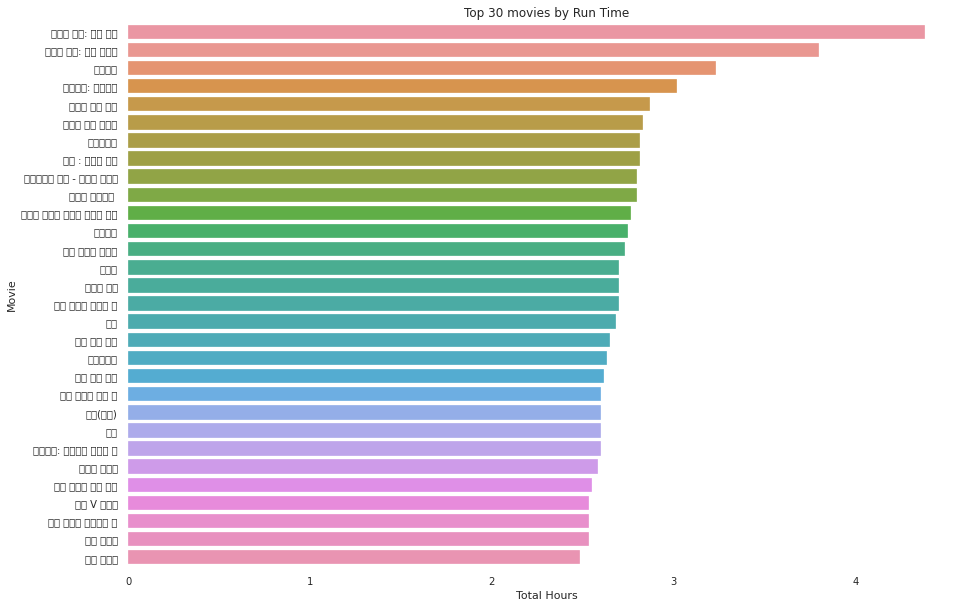

In [ ]:
#전체 영화 상영시간 순위
top_30_screenplay = dataset.sort_values(by = 'screenplay', ascending = False).head(30)

plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = '영화제목', x = 'screenplay', dodge = False)
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.rc('font', family='NanumGothic')

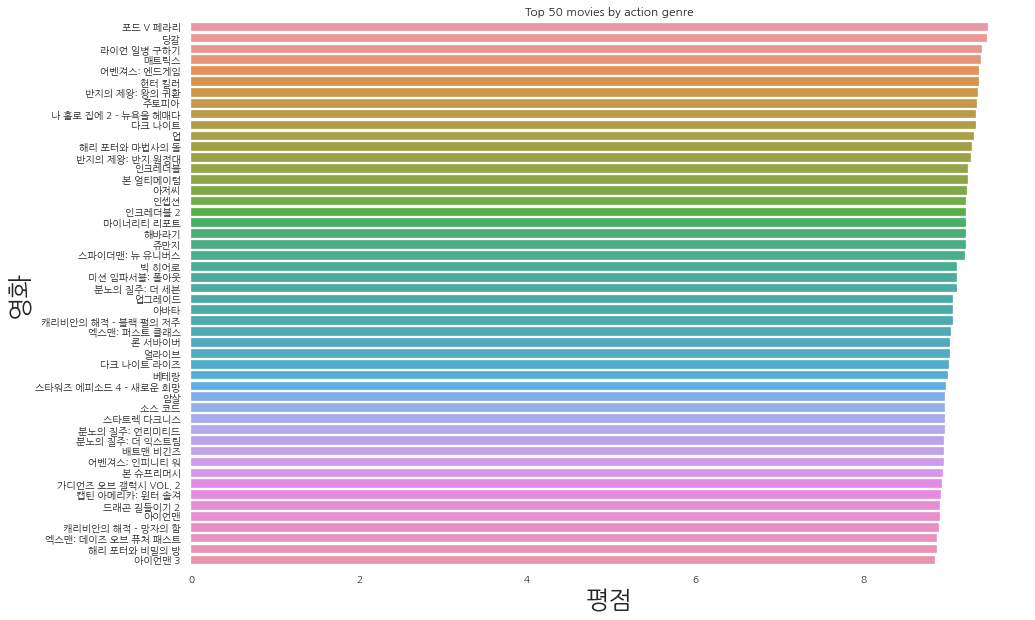

In [ ]:
#장르별 영화 평점 순위
def top_rated(genre, platform, n_top):
    genre = platform.loc[platform[genre] == 1]

    top_50 = genre.sort_values(by = '영화평점', ascending = False).head(n_top)

    plt.figure(figsize = (15, 10))
    sns.barplot(data = top_50, y = '영화제목', x = '영화평점', dodge = False)
    plt.xlabel('평점', FontSize = 25)
    plt.ylabel('영화', FontSize = 25)
    plt.title('Top 50 movies by action genre',)
    plt.show()
    
top_rated ('액션',dataset, 50)

In [ ]:
total_genre = pd.DataFrame()
for i in genres:
  count = 0
  for j in range(0,680):
    if dataset[i][j] == True:
      count+=1
  total_genre.loc['수',i] = count

In [ ]:
total_genre_trans

NameError: ignored

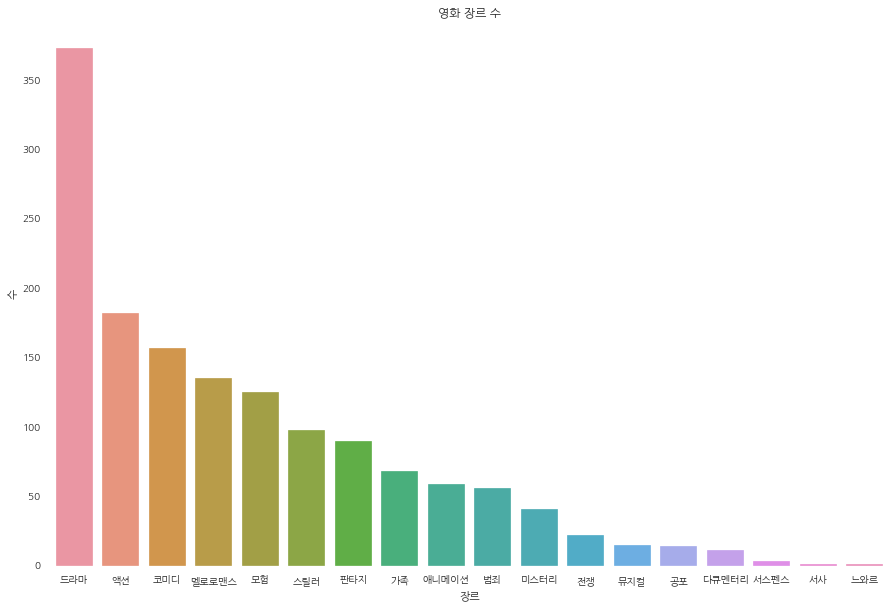

In [ ]:
#영화 장르 많은 순서대로
rate_genre = total_genre_trans.sort_values(by = '수', ascending = False).head(20)
plt.figure(figsize = (15, 10))
sns.barplot(data = rate_genre, x='장르', y ='수', dodge = False)
plt.xlabel('장르')
plt.ylabel('수')
plt.title('영화 장르 수')
plt.rc('font', family='NanumGothic')

In [ ]:
total_genre

,액션,코미디,드라마,범죄,스릴러,애니메이션,멜로로맨스,판타지,가족,모험,다큐멘터리,미스터리,전쟁,공포,뮤지컬,서스펜스,서사,느와르
수,182.0,157.0,373.0,56.0,98.0,59.0,135.0,90.0,68.0,125.0,11.0,41.0,22.0,14.0,15.0,3.0,1.0,1.0


In [ ]:
total_genre_trans

,장르,수
0,액션,182.0
1,코미디,157.0
2,드라마,373.0
3,범죄,56.0
4,스릴러,98.0
5,애니메이션,59.0
6,멜로로맨스,135.0
7,판타지,90.0
8,가족,68.0
9,모험,125.0


In [ ]:
total_genre_trans = total_genre.transpose()
total_genre_trans.reset_index(inplace=True)
total_genre_trans.columns = ['장르','수']

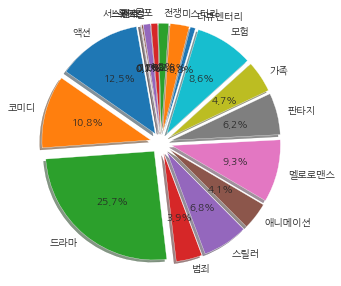

In [ ]:
labels = genres
sizes = list(total_genre.loc[0])
explode = (0.1, 0.1, 0.1, 0.1 ,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

# fig1 , ax1 = plt.subplots()
plt.figure(figsize = (5, 5))
plt.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        
        startangle = 100)


ax1.axis ('equal')
plt.show()

In [ ]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        font_path ='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (10, 8),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
str1 = str(list(dataset['장르']))
genre_list = ''
for i in range(len(str1)):
  tmp = str1[i]
  if tmp != "'" and tmp != "[" and tmp != "]" and tmp != "," and tmp != 'n' and tmp != 'a':
    genre_list = genre_list + str1[i]


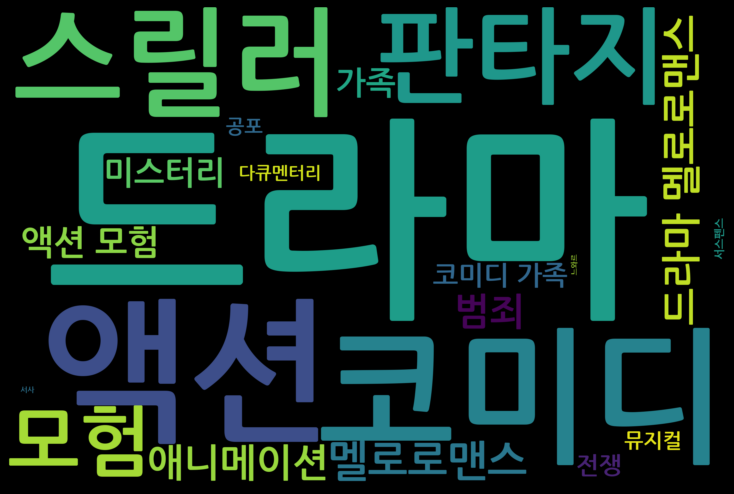

In [ ]:
generate_word_cloud(genre_list)

In [ ]:
pandas_profiling.ProfileReport(df_da)